In [27]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model

import expenses.transactions

transactions_file = '/Users/brigaldies/Documents/Personal/Budget/transactions.xlsx'

days = 90
starting_balance = 6119.30

start_date = datetime.datetime.now()
end_date = start_date + datetime.timedelta(days=days)

# Load the transactions
tx_df = expenses.transactions.load_transactions(transactions_file, starting_balance=starting_balance, days=days)

# Display the data frame
tx_df


Loading transactions from pathname /Users/brigaldies/Documents/Personal/Budget/transactions.xlsx...
Transactions count: 29
Starting balance  : 6119.3
Days in the future: 90
Date interval     : From 2018-09-16 14:15:33.838364 to 2018-12-15 14:15:33.838364


Starting balance: 6119.3
Min balance     : 474.47
Max balance     : 7615.69
Max average     : 2849.66


,date_ts,item,item_type,amount,balance
date,,,,,
2018-09-19,1.537330e+09,eCL transfer,credit,500.00,6619.3
2018-09-21,1.537502e+09,(OSC) Flight to Atlanta reimbursement,credit,996.39,7615.69
2018-09-21,1.537502e+09,Farm Bureau Umbrella annual fee,debit,325.00,7290.69
2018-09-21,1.537502e+09,Red Pump Kitchen downpayment,debit,1389.00,5901.69
2018-09-24,1.537762e+09,IRA Vanguard,debit,50.00,5851.69
2018-09-26,1.537934e+09,Jennifer’s ring,debit,126.00,5725.69
2018-09-26,1.537934e+09,Julien’s rent & groceries,debit,782.00,4943.69
2018-09-26,1.537934e+09,Lucie’s rent & groceries,debit,462.00,4481.69
2018-09-26,1.537934e+09,Prius,debit,269.51,4212.18


[0.0, 1000.0, 2000.0, 3000.0, 4000.0, 5000.0, 6000.0, 7000.0, 8000.0, 474.47]


Text(0.5,0,'Transaction Date')

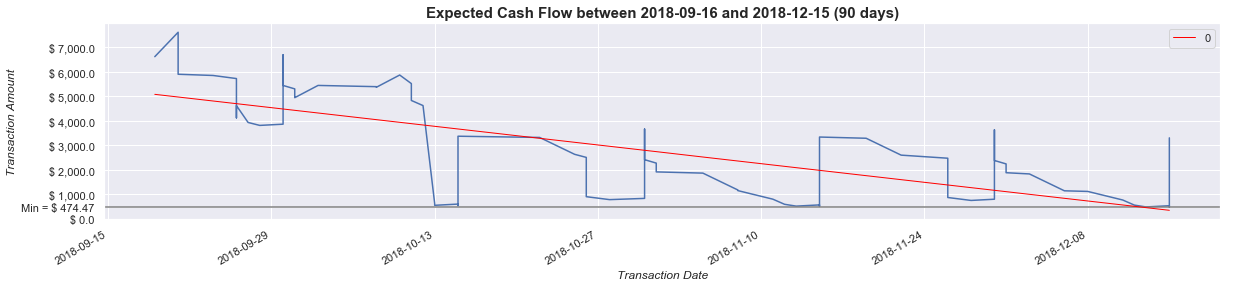

In [33]:
# Reset default params
sns.set()

# Set context
sns.set_context("notebook")

# Initialize Figure and Axes object
fig, ax = plt.subplots(figsize=(20, 4))

# Extract the time series to plot
ts = tx_df.loc[:, 'balance']

# Display a line chart over a time line
plt.plot(ts[:], '-')
_ = plt.xticks(rotation=45)

# Display the min balance with a horizontal line
min_balance = np.round(np.min(tx_df['balance']), 2)
plt.axhline(min_balance, color="gray")

# Add the min balance ticker
locs = list(ax.get_yticks())
locs += [min_balance]
# print(labels)
print(locs)
ax.set_yticklabels(['$ {:,}'.format(loc) if loc != min_balance else 'Min = $ {:,}'.format(loc) for loc in locs])
ax.set_yticks(locs)
ax.grid()

# Fit a linear regression line
lr = linear_model.LinearRegression()
lr.fit(X=tx_df.date_ts.values.reshape(-1, 1), y=tx_df['balance'].values.reshape(-1, 1))
prediction_df = pd.DataFrame(lr.predict(tx_df.date_ts.values.reshape(-1, 1)), index=tx_df.index)
prediction_df.plot(linestyle='-', color='red', linewidth=1, ax=ax)

# Set plot title and axis labels
ax.set_title('Expected Cash Flow between {:%Y-%m-%d} and {:%Y-%m-%d} ({} days)'.format(start_date, end_date, days), fontweight='bold', fontsize=15)
ax.set_ylabel("Transaction Amount", fontsize=12, fontstyle='italic')
ax.set_xlabel("Transaction Date", fontsize=12, fontstyle='italic')
